In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Loading all the libraries

In [7]:
from __future__ import print_function
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten,BatchNormalization
from tensorflow.keras.layers import Conv2D,MaxPooling2D
#from IPython.display import display
from PIL import Image
from sklearn.preprocessing import LabelEncoder
import os
import numpy as np
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import load_model
from tensorflow import keras
from tensorflow.keras import layers
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.utils import np_utils

# to calculate accuracy
from sklearn.metrics import accuracy_score

Loading the pretrained model 

In [4]:
pre_trained_model =load_model('/content/drive/My Drive/small_train/checkpoint_accuracy281.hdf5')
pre_trained_model.trainable = False
#print(pre_trained_model.summary())
last_layer = pre_trained_model.get_layer('activation_11')
print('last layer output shape: ', last_layer.output_shape)
last_output = last_layer.output

last layer output shape:  (None, 128)


Creating the transfer learning model

In [5]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import Model
# Flatten the output layer to 1 dimension
x = layers.Flatten()(last_output)
# # Add a fully connected layer with 1,024 hidden units and ReLU activation
x = layers.Dense(1024, activation='relu')(x)
# # Add a final sigmoid layer for classification
x = layers.Dense(10, activation='softmax')(x)
#
model = Model(pre_trained_model.input, x)
print(model.input_shape)

(None, 28, 28, 1)


Model is compiled. Training generator is defined from the mnistTask dataset. Checkpointer is created using accuracy as monitor.

In [6]:
#Model is compiled
model.compile(optimizer = RMSprop(lr=0.0001),      
               loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

#Used to generate more images from training data
train_datagen = ImageDataGenerator(rescale = 1./255.,
                                   rotation_range = 40,
                                   width_shift_range = 0.2,
                                   height_shift_range = 0.2,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
train_dir="/content/drive/My Drive/mnistTask"
#Loading and Preprocessing the training images 
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size = 20,
                                                    color_mode='grayscale',
                                                    class_mode = 'categorical',
                                                    target_size = (28,28))

#Checkpointer is created 
checkpointer = keras.callbacks.ModelCheckpoint(filepath = '/content/drive/My Drive/mnistTaskcheckpoint_accuracy.hdf5',
                                               monitor='accuracy',
                                               mode='min',
                                               save_best_only=False,
                                               verbose=1)

Found 60000 images belonging to 10 classes.


Model is fit on the training data

In [11]:
epochs=20
history=model.fit(                                   #Model is fitted on the training data
                train_generator,
                steps_per_epoch=20,
                epochs=epochs,
                callbacks = [checkpointer])

Epoch 1/20
20/20 [==============================] - 254s 11s/step - loss: 113.2408 - accuracy: 0.0968

Epoch 00001: saving model to /content/drive/My Drive/mnistTaskcheckpoint_accuracy.hdf5
Epoch 2/20
20/20 [==============================] - 226s 11s/step - loss: 26.6563 - accuracy: 0.1174

Epoch 00002: saving model to /content/drive/My Drive/mnistTaskcheckpoint_accuracy.hdf5
Epoch 3/20
20/20 [==============================] - 231s 12s/step - loss: 28.0292 - accuracy: 0.1079

Epoch 00003: saving model to /content/drive/My Drive/mnistTaskcheckpoint_accuracy.hdf5
Epoch 4/20
20/20 [==============================] - 220s 11s/step - loss: 26.5523 - accuracy: 0.1003

Epoch 00004: saving model to /content/drive/My Drive/mnistTaskcheckpoint_accuracy.hdf5
Epoch 5/20
20/20 [==============================] - 215s 11s/step - loss: 32.0212 - accuracy: 0.0818

Epoch 00005: saving model to /content/drive/My Drive/mnistTaskcheckpoint_accuracy.hdf5
Epoch 6/20
20/20 [==============================] - 21

Accuracy after 20 epochs=0.1263

# **Testing the model on mnist test set**

Loading the libraries

In [ ]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend as k
import matplotlib.pyplot as plt
import numpy as np

Loading the model which uses the pretrained model

In [3]:
trained_model =load_model('/content/drive/My Drive/mnistTaskcheckpoint_accuracy.hdf5')

Loading the mnist dataset and preprocessing it

In [8]:
# loading the dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# building the input vector from the 28x28 pixels
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

# normalizing the data to help with the training
X_train /= 255
X_test /= 255

# one-hot encoding using keras' numpy-related utilities
n_classes = 10
print("Shape before one-hot encoding: ", y_train.shape)
Y_train = np_utils.to_categorical(y_train, n_classes)
Y_test = np_utils.to_categorical(y_test, n_classes)
print("Shape after one-hot encoding: ", Y_train.shape)

11493376/11490434 [==============================] - 0s 0us/step
Shape before one-hot encoding:  (60000,)
Shape after one-hot encoding:  (60000, 10)


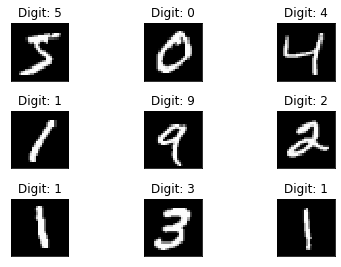

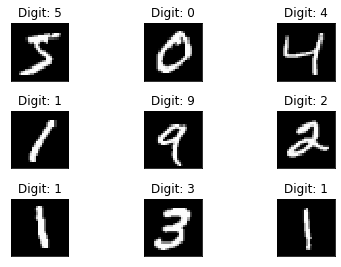

In [16]:
#visualising first 9 data from training dataset
fig = plt.figure()
for i in range(9):
  plt.subplot(3,3,i+1)
  plt.tight_layout()
  plt.imshow(X_train[i], cmap='gray', interpolation='none')
  plt.title("Digit: {}".format(y_train[i]))
  plt.xticks([])
  plt.yticks([])
fig

Printing the shape of data

In [17]:
# printing the actual data shape before we reshape and normalize
print("X_train shape", X_train.shape)
print("y_train shape", y_train.shape)
print("X_test shape", X_test.shape)
print("y_test shape", y_test.shape)

X_train shape (60000, 28, 28)
y_train shape (60000,)
X_test shape (10000, 28, 28)
y_test shape (10000,)


In [18]:
#input image size 28*28
img_rows , img_cols = 28, 28

Reshaping the data so that it can be used with the model

In [19]:
#reshaping
#this assumes our data format
#For 3D data, "channels_last" assumes (conv_dim1, conv_dim2, conv_dim3, channels) while 
#"channels_first" assumes (channels, conv_dim1, conv_dim2, conv_dim3).
if k.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_test = X_test.reshape(X_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
#more reshaping
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [20]:
num_category = 10

In [21]:
y_train = keras.utils.to_categorical(y_train, num_category)
y_test = keras.utils.to_categorical(y_test, num_category)
y_train[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

Evaluating the accuracy on test set

In [22]:
score = trained_model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0]) #Test loss: 19.548660278320312
print('Test accuracy:', score[1]) #Test accuracy: 0.14259999990463257

Test loss: 19.548660278320312
Test accuracy: 0.14259999990463257
